> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. In order to work with the data in this workspace, you also need to upload it to the workspace. To do so, click on the jupyter icon in the upper left to be taken back to the workspace directory. There should be an 'Upload' button in the upper right that will let you add your data file(s) to the workspace. You can then click on the .ipynb file name to come back here.

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv("tmdb-movies.csv")

In [3]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

# Making copy of dataframe

In [7]:
df_1 = df.copy()

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

# Data Cleaning 
## in this data first I will see if there's duplicate then remove them

In [8]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df_1['original_title'].drop_duplicates(inplace = True)

In [9]:
df_1['original_title'].duplicated().sum()

295

## I have set the original title of the movie as the index so It will be easier to recall the properties of each movie

In [10]:
df_1.set_index('id',inplace=True)

# detection the null value and fill them 

In [11]:
df_1.fillna(0,inplace = True)

In [12]:
df_1.isna().sum()

imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
homepage                0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [13]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10866 entries, 135397 to 22293
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   imdb_id               10866 non-null  object 
 1   popularity            10866 non-null  float64
 2   budget                10866 non-null  int64  
 3   revenue               10866 non-null  int64  
 4   original_title        10866 non-null  object 
 5   cast                  10866 non-null  object 
 6   homepage              10866 non-null  object 
 7   director              10866 non-null  object 
 8   tagline               10866 non-null  object 
 9   keywords              10866 non-null  object 
 10  overview              10866 non-null  object 
 11  runtime               10866 non-null  int64  
 12  genres                10866 non-null  object 
 13  production_companies  10866 non-null  object 
 14  release_date          10866 non-null  object 
 15  vote_count    

## define column to be remove (not needed for my analysis)
## change the type of float to int and release date to datatime

In [14]:
delcol =['imdb_id','homepage','director','tagline','keywords','overview','budget_adj','revenue_adj']
df_1.drop(delcol,axis =1,inplace = True)

In [15]:
df_1['popularity'] = df_1['popularity'].astype(int)
df_1['vote_average'] = df_1['vote_average'].astype(int)
df_1['release_date'] = pd.to_datetime(df['release_date'])


In [16]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10866 entries, 135397 to 22293
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   popularity            10866 non-null  int32         
 1   budget                10866 non-null  int64         
 2   revenue               10866 non-null  int64         
 3   original_title        10866 non-null  object        
 4   cast                  10866 non-null  object        
 5   runtime               10866 non-null  int64         
 6   genres                10866 non-null  object        
 7   production_companies  10866 non-null  object        
 8   release_date          2877 non-null   datetime64[ns]
 9   vote_count            10866 non-null  int64         
 10  vote_average          10866 non-null  int32         
 11  release_year          10866 non-null  int64         
dtypes: datetime64[ns](1), int32(2), int64(5), object(4)
memory usage: 101

In [17]:
df_1

,popularity,budget,revenue,original_title,cast,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
id,,,,,,,,,,,,
135397,32,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,NaT,5562,6,2015
76341,28,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,NaT,6185,7,2015
262500,13,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,NaT,2480,6,2015
140607,11,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,NaT,5292,7,2015
168259,9,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,NaT,2947,7,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
21,0,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,95,Documentary,Bruce Brown Films,2015-06-15,11,7,1966
20379,0,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,NaT,20,5,1966
39768,0,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,94,Mystery|Comedy,Mosfilm,NaT,11,6,1966


# Function draw scatterplot

In [18]:
def scatter(a,b,c,d,e):
    plt.scatter(x=df_1[a],y=df_1[b])
    plt.xlabel(c)
    plt.ylabel(d)
    plt.title(e)
    plt.show()

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (relation between revenue and vote average)

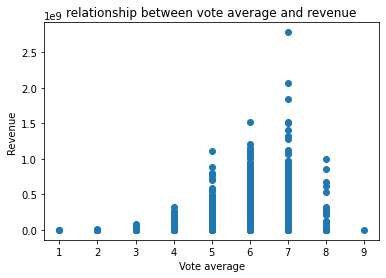

In [19]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
scatter('vote_average','revenue','Vote average','Revenue','relationship between vote average and revenue')

## as we can see the budget increases as the vote average increase but after 7 vote average iit begin to decrease 

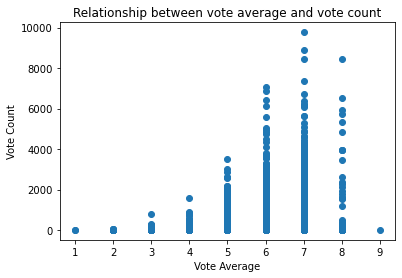

In [20]:
scatter('vote_average','vote_count','Vote Average','Vote Count','Relationship between vote average and vote count')

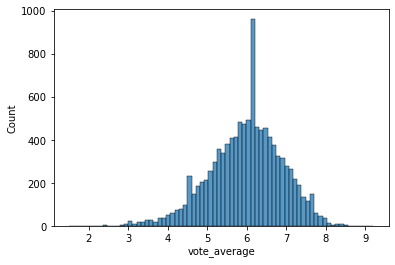

In [62]:
sns.histplot(x='vote_average',data=df_1);

### although the scatterplot is a little bit messy but it shows us that the vote count decrases after 6 vote average and becomes very low after vote average 8 this means that less people have either counted (or watched) the movie and that's the reason why the budget decreases after 7 vote average

# research Qeustion 2 (relation between popularity and revenue)

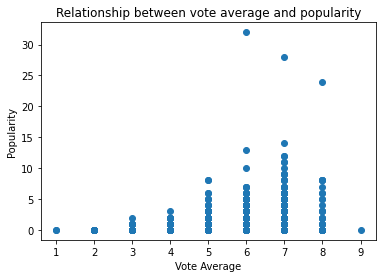

In [21]:
scatter('vote_average','popularity','Vote Average','Popularity','Relationship between vote average and popularity')

# how the budget increase with year

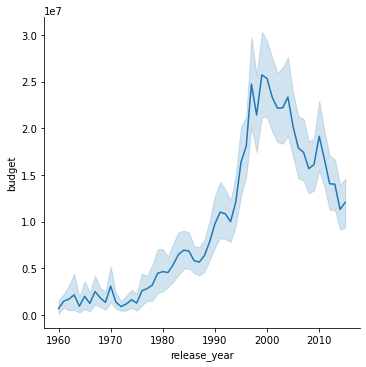

In [26]:
sns.relplot(x='release_year',y='budget',kind='line',data=df_1);

## as we can see the budget has increased dramaticlly after the 90s  but it begins to decrease after 2000

### Research Question 2  (Relation between vote average and popularity)

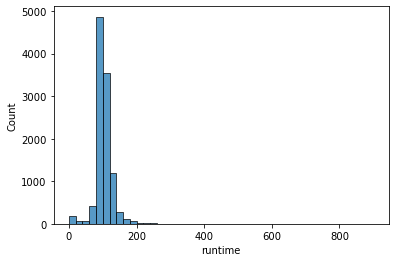

In [59]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
sns.histplot(x='runtime',data=df_1,bins=20);

### as we can see most runtime is 100 minutes and most movies' runtime range between 80-140 minutes

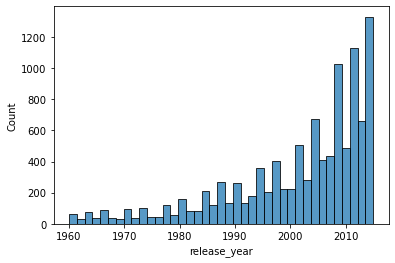

In [64]:
sns.histplot(x='release_year',data=df_1);

<a id='conclusions'></a>
# Conclusions
### as the data show the more popular movies tend to be more rated and also gained more money so the relation is positive although it's not the case for movies voted 8 or more as the vote count becomes very low which either because less people have watched the movie or the movies are over rated 

### movie production have increased dramatically after the 90s which is shown either by the number of movies produced per year or the budget both have shown dramatic increase 



# limitations
### the data has a lot of null data that may affect the result of data I have fixed it with null (it wasn't the best option but the problem is that the null data weren't the same data type some were strings others were int datatype etc,, so it needed more cleaning 
### also the data didn't provide the number of people who watched the movie (or at least average number) so some movies were over rated (actually I have faced it in real life while searching for good movie to watch it was rated +9 but actualy had only 10 votes and the movie was very borind :) )
### one of the problem of this data is that the actors and genres weren't in the form of list or dictionary (the one wich was plural eg some movies were horror and comedy) so for example we can't directly work on them to consider them as one part i.e. a genre that's (Horror and Comedy) or to see the relationship between popularity and certain actor (or maybe 'squad' of actors) etc,,

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])